In [ ]:
!pip install pandas
!pip install tensorflow
''' sklearn is now deprecated'''
!pip install scikit-learn
!pip install matplotlib

In [1]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# load the data
iris_data = pd.read_csv("../Deep_Learning_Model/iris.csv")

print("Loaded Data: \n--------------------")
print(iris_data.head())

#using a label encoder to convert string to numeric values for the target variable
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data["Species"] = label_encoder.fit_transform(iris_data["Species"])

#convert input to numpy array
np_iris = iris_data.to_numpy()

#separate feature and target variables
X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]

print("\n Feature before scaling: \n---------------------------")
print(X_data[:5,:])
print("\n Target before scaling : \n-------------------")
print(Y_data[:5])

#creating a scaler model that is fit on the input data
scaler = StandardScaler().fit(X_data)

#scaling the numeric feature variables
X_data = scaler.transform(X_data)

#converting target variable as a one-hot encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\n Features after scaling: \n-----------------")
print(X_data[:5,:])
print("\n Target after one-hot-encoding: \n -------------------------")
print(Y_data[:5,:])

#split training and test data
X_train,X_test, Y_train, Y_test = train_test_split(X_data,Y_data, test_size =0.10)

print("\n Train Test Dimensions: \n -----------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

Loaded Data: 
--------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

 Feature before scaling: 
---------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

 Target before scaling : 
-------------------
[0. 0. 0. 0. 0.]

 Features after scaling: 
-----------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

 Target after one-hot-encoding: 
 -------------------------
[[1.

In [3]:
from tensorflow import keras

#Number of classes in the target variable
NB_classes=3

#create a sequencial model in keras
model = tf.keras.models.Sequential()

#add the first hidden layer
model.add(keras.layers.Dense(128,                                 #Number of Nodes
                             input_shape =(4,),                   #Number of input variable
                             name = "Hidden-Layer-1",             #logical Name
                             activation = "relu"))                #activation function

#add a second hidden layer
model.add(keras.layers.Dense(128,
                             name ="Hidden-Layer-2",
                             activation="relu"))

#add an output layer with softmax function
model.add(keras.layers.Dense(NB_classes,
                             name = "Output-Layer",
                             activation ="softmax"))

#compile the model with loss and metrics
model.compile(loss = "categorical_crossentropy",
              metrics =["accuracy"])

#printing the model meta-data
model.summary()

C:\Users\Aayush\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)


 Training Progress: 
---------------------------
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5471 - loss: 0.9670 - val_accuracy: 0.7037 - val_loss: 0.7058
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8127 - loss: 0.5654 - val_accuracy: 0.7037 - val_loss: 0.5616
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8222 - loss: 0.4625 - val_accuracy: 0.7037 - val_loss: 0.4968
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8819 - loss: 0.3637 - val_accuracy: 0.7037 - val_loss: 0.4520
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8925 - loss: 0.2969 - val_accuracy: 0.7407 - val_loss: 0.4174
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9096 - loss: 0.2748 - val_accuracy: 0.7778 - val_loss: 0.3879
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8846 - loss: 0.2276 - val_accuracy: 0.7778 - val_loss: 0.3590
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9109 - loss:

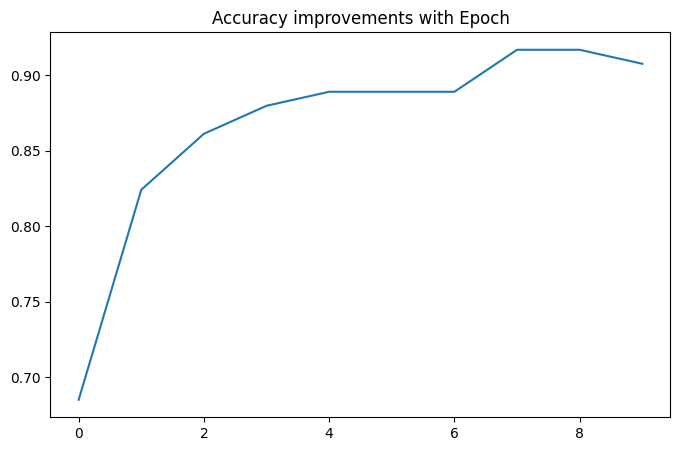


Evalution against test dataset: 
------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8667 - loss: 0.2742


[0.2742275297641754, 0.8666666746139526]

In [4]:
# make it verbose so we can see the progress
VERBOSE =1

#setup hyper parameters for training
#set batch size
BATCH_SIZE=16
#set the number of epoch
EPOCHS=10
#set the validation split . 20% of the training data will be used for validation after each epoch
Validation_split = 0.2

print("\n Training Progress: \n---------------------------")
#Fit the model. This will perform the entire training cycle, including forward propagation, loss computation, backward propagation and gradient descent
#Execute for the specified batch sizes and epoch
#perform validation after each epoch

history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose=VERBOSE, validation_split=Validation_split)
print("\nAccuracy during Training: \n-------------------------")
import matplotlib.pyplot as plt

#plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#evalute the model against the test dataset and print the results
print("\nEvalution against test dataset: \n------------------------")
model.evaluate(X_test,Y_test)

In [10]:
#Saving a model
model.save("../Deep_Learning_Model/iris_save.keras")

#loading the model

loaded_model = keras.models.load_model("iris_save.keras")

loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,080 (137.04 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,541 (68.52 KB)

In [12]:
#Prediction for the deep learning mordel

prediction_input = [[6.6,3.,4.4,1.4]]

#scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

raw_prediction = model.predict(scaled_input)
print("Raw predictions Output (Probabilities) : ", raw_prediction)

#finding the prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Raw predictions Output (Probabilities) :  [[0.02441652 0.5910588  0.38452476]]
Prediction is  ['versicolor']
